In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [45]:
proj = '56Fe'
trg = '141Pr'
cn = '197At'
bf = 0.66
ch = 'xn'
V0 = 40

file_name10 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_' + 'barfac' + str(bf) + '.dat'
file_name0 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_' + 'barfac' + str(bf) + '.dat'

df10 = pd.read_csv('data/' + file_name10, sep='\t')
df0 = pd.read_csv('data/' + file_name0, sep='\t')
df_exp = pd.read_csv('data/exp_data.dat', sep='\t')

In [47]:
dfm10_mb = df10.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm_exp_mb = df_exp.melt(id_vars=['E_lab', 'E*'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
dfm_exp = dfm_exp_mb

dfm10['CS'] = dfm10_mb['CS']*1E3
dfm0['CS'] = dfm0_mb['CS']*1E3
dfm_exp['CS'] = dfm_exp_mb['CS']*1E3

/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


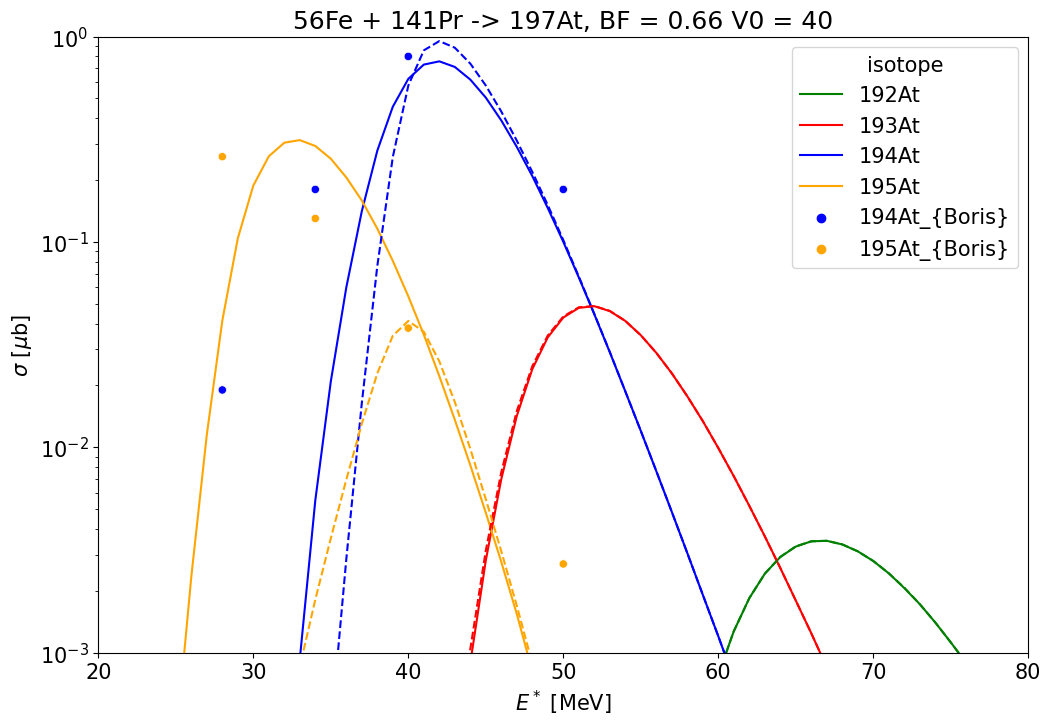

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[3:-2]))], palette=['green', 'red', 'blue', 'orange'])
plt.semilogy()
plt.ylim(1e-3, 1e0)
# plt.xlim(right=50)
plt.xlim(20, 80)
plt.title(proj + ' + ' + trg + ' -> ' + cn + ', BF = ' + str(bf) + ' V0 = ' + str(V0))
plt.ylabel('$\sigma$ [$\mu$b]')
plt.xlabel('$E^*$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[3:-2]))], linestyle='--', legend=None, palette=['green', 'red', 'blue', 'orange'])

sns.scatterplot(x='E*', y='CS', hue='isotope', data=dfm_exp, palette=['blue', 'orange'])

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_' + '_' + 'barfac' + str(bf) + '_massesUpdated' + '_V0-' + str(V0) + '.pdf')

In [49]:
proj = '56Fe'
trg = '141Pr'
cn = '197At'
bf = 0.66
ch = 'xn'
V0 = 59

file_name10 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_' + 'barfac' + str(bf) + '.dat'
file_name0 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_' + 'barfac' + str(bf) + '.dat'

df10 = pd.read_csv('data/v0_var/' + file_name10, sep='\t')
df0 = pd.read_csv('data/v0_var/' + file_name0, sep='\t')
df_exp = pd.read_csv('data/exp_data.dat', sep='\t')

In [51]:
dfm10_mb = df10.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm_exp_mb = df_exp.melt(id_vars=['E_lab', 'E*'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
dfm_exp = dfm_exp_mb

dfm10['CS'] = dfm10_mb['CS']*1E3
dfm0['CS'] = dfm0_mb['CS']*1E3
dfm_exp['CS'] = dfm_exp_mb['CS']*1E3

/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


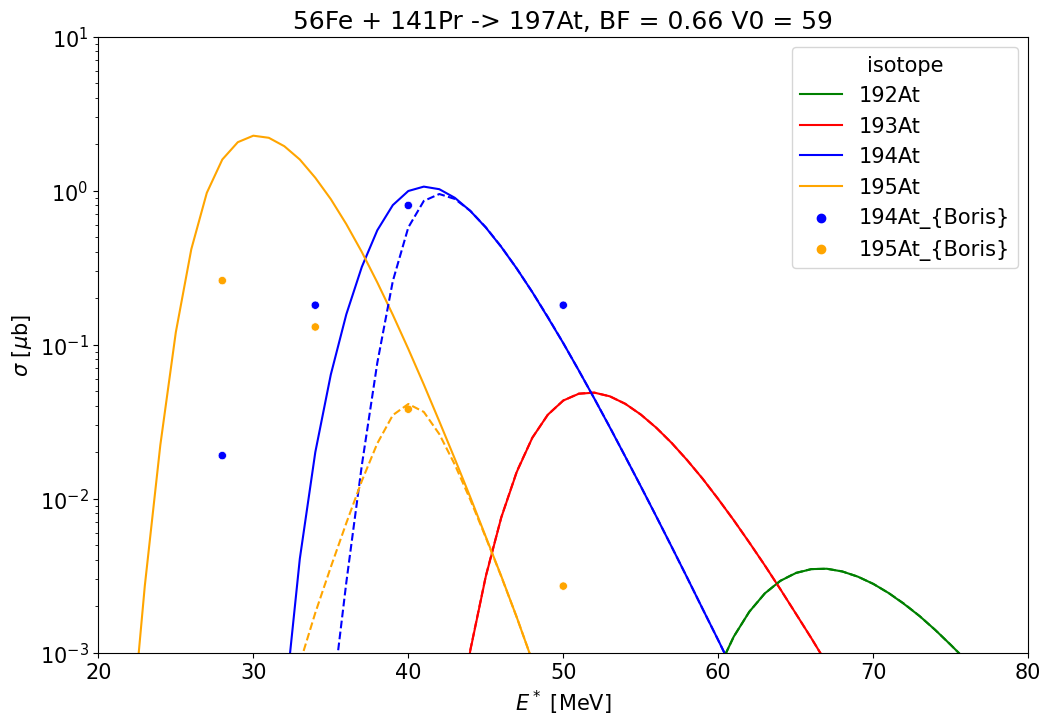

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[3:-2]))], palette=['green', 'red', 'blue', 'orange'])
plt.semilogy()
plt.ylim(1e-3, 1e1)
# plt.xlim(right=50)
plt.xlim(20, 80)
plt.title(proj + ' + ' + trg + ' -> ' + cn + ', BF = ' + str(bf) + ' V0 = ' + str(V0))
plt.ylabel('$\sigma$ [$\mu$b]')
plt.xlabel('$E^*$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[3:-2]))], linestyle='--', legend=None, palette=['green', 'red', 'blue', 'orange'])

sns.scatterplot(x='E*', y='CS', hue='isotope', data=dfm_exp, palette=['blue', 'orange'])

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_' + '_' + 'barfac' + str(bf) + '_massesUpdated' + '_V0-' + str(V0) + '.pdf')